In [1]:
# Import Python library for working with spreadsheets
import pandas as pd

# Enables inline display of plots within the Python Notebook (instead of having them pop up on new windows)
%matplotlib inline

# Display figures the same way they will be saved.
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}

# Import Python libraries for plotting
import seaborn as sns
sns.set_theme(style="white")
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({
    'figure.dpi': 300,
    "font.family": "serif",
})

# Load the dataset
# The ELLIPSE dataset ("ELLIPSE_Final_github.csv") can be downloaded from the following link: https://github.com/scrosseye/ELLIPSE-Corpus
df = pd.read_csv('../data/ELLIPSE_Final_github.csv')

In [2]:
# Allows us to take a quick look at the loaded spreadsheet (= dataframe)
df.head()

,text_id_kaggle,full_text,gender,grade,race_ethnicity,num_words,num_words2,num_words3,num_sent,num_para,...,task,SES,prompt,Overall,Cohesion,Syntax,Vocabulary,Phraseology,Grammar,Conventions
0,5AA45740A848,"Dear, TEACHER_NAME\n\nI think phone policy at ...",Male,8,Hispanic/Latino,111,122,118,7,2,...,Independent,Economically disadvantaged,Cell phones at school,3.0,3.5,2.5,3.5,3.0,3.5,2.5
1,790891A35047,"Dear, Principal\r\n\r\nIn my opinion, I think ...",Female,8,Hispanic/Latino,99,105,102,6,2,...,Independent,Economically disadvantaged,Cell phones at school,3.0,2.5,3.0,4.0,3.5,3.0,3.5
2,C254D74362A3,PHONES\n\nDear principal students should have ...,Female,8,Hispanic/Latino,121,134,128,4,2,...,Independent,Economically disadvantaged,Cell phones at school,3.0,2.5,3.0,3.0,3.0,3.5,3.0
3,0985602832CD,phones\n\ni think phones should be allowed in ...,Male,8,Hispanic/Latino,182,202,192,2,2,...,Independent,Economically disadvantaged,Cell phones at school,3.0,2.0,2.5,3.0,3.0,3.0,2.5
4,3AB3FC197550,Do you really think students need cell phones ...,Female,8,Hispanic/Latino,192,210,201,11,4,...,Independent,Not economically disadvantaged,Cell phones at school,3.0,2.0,3.0,3.0,3.0,3.0,2.0


In [3]:
# Print out the name of all columns in the dataframe
df.columns

Index(['text_id_kaggle', 'full_text', 'gender', 'grade', 'race_ethnicity',
       'num_words', 'num_words2', 'num_words3', 'num_sent', 'num_para',
       'num_word_div_para', 'MTLD', 'TTR', 'Type', 'Token', 'task', 'SES',
       'prompt', 'Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology',
       'Grammar', 'Conventions'],
      dtype='object')

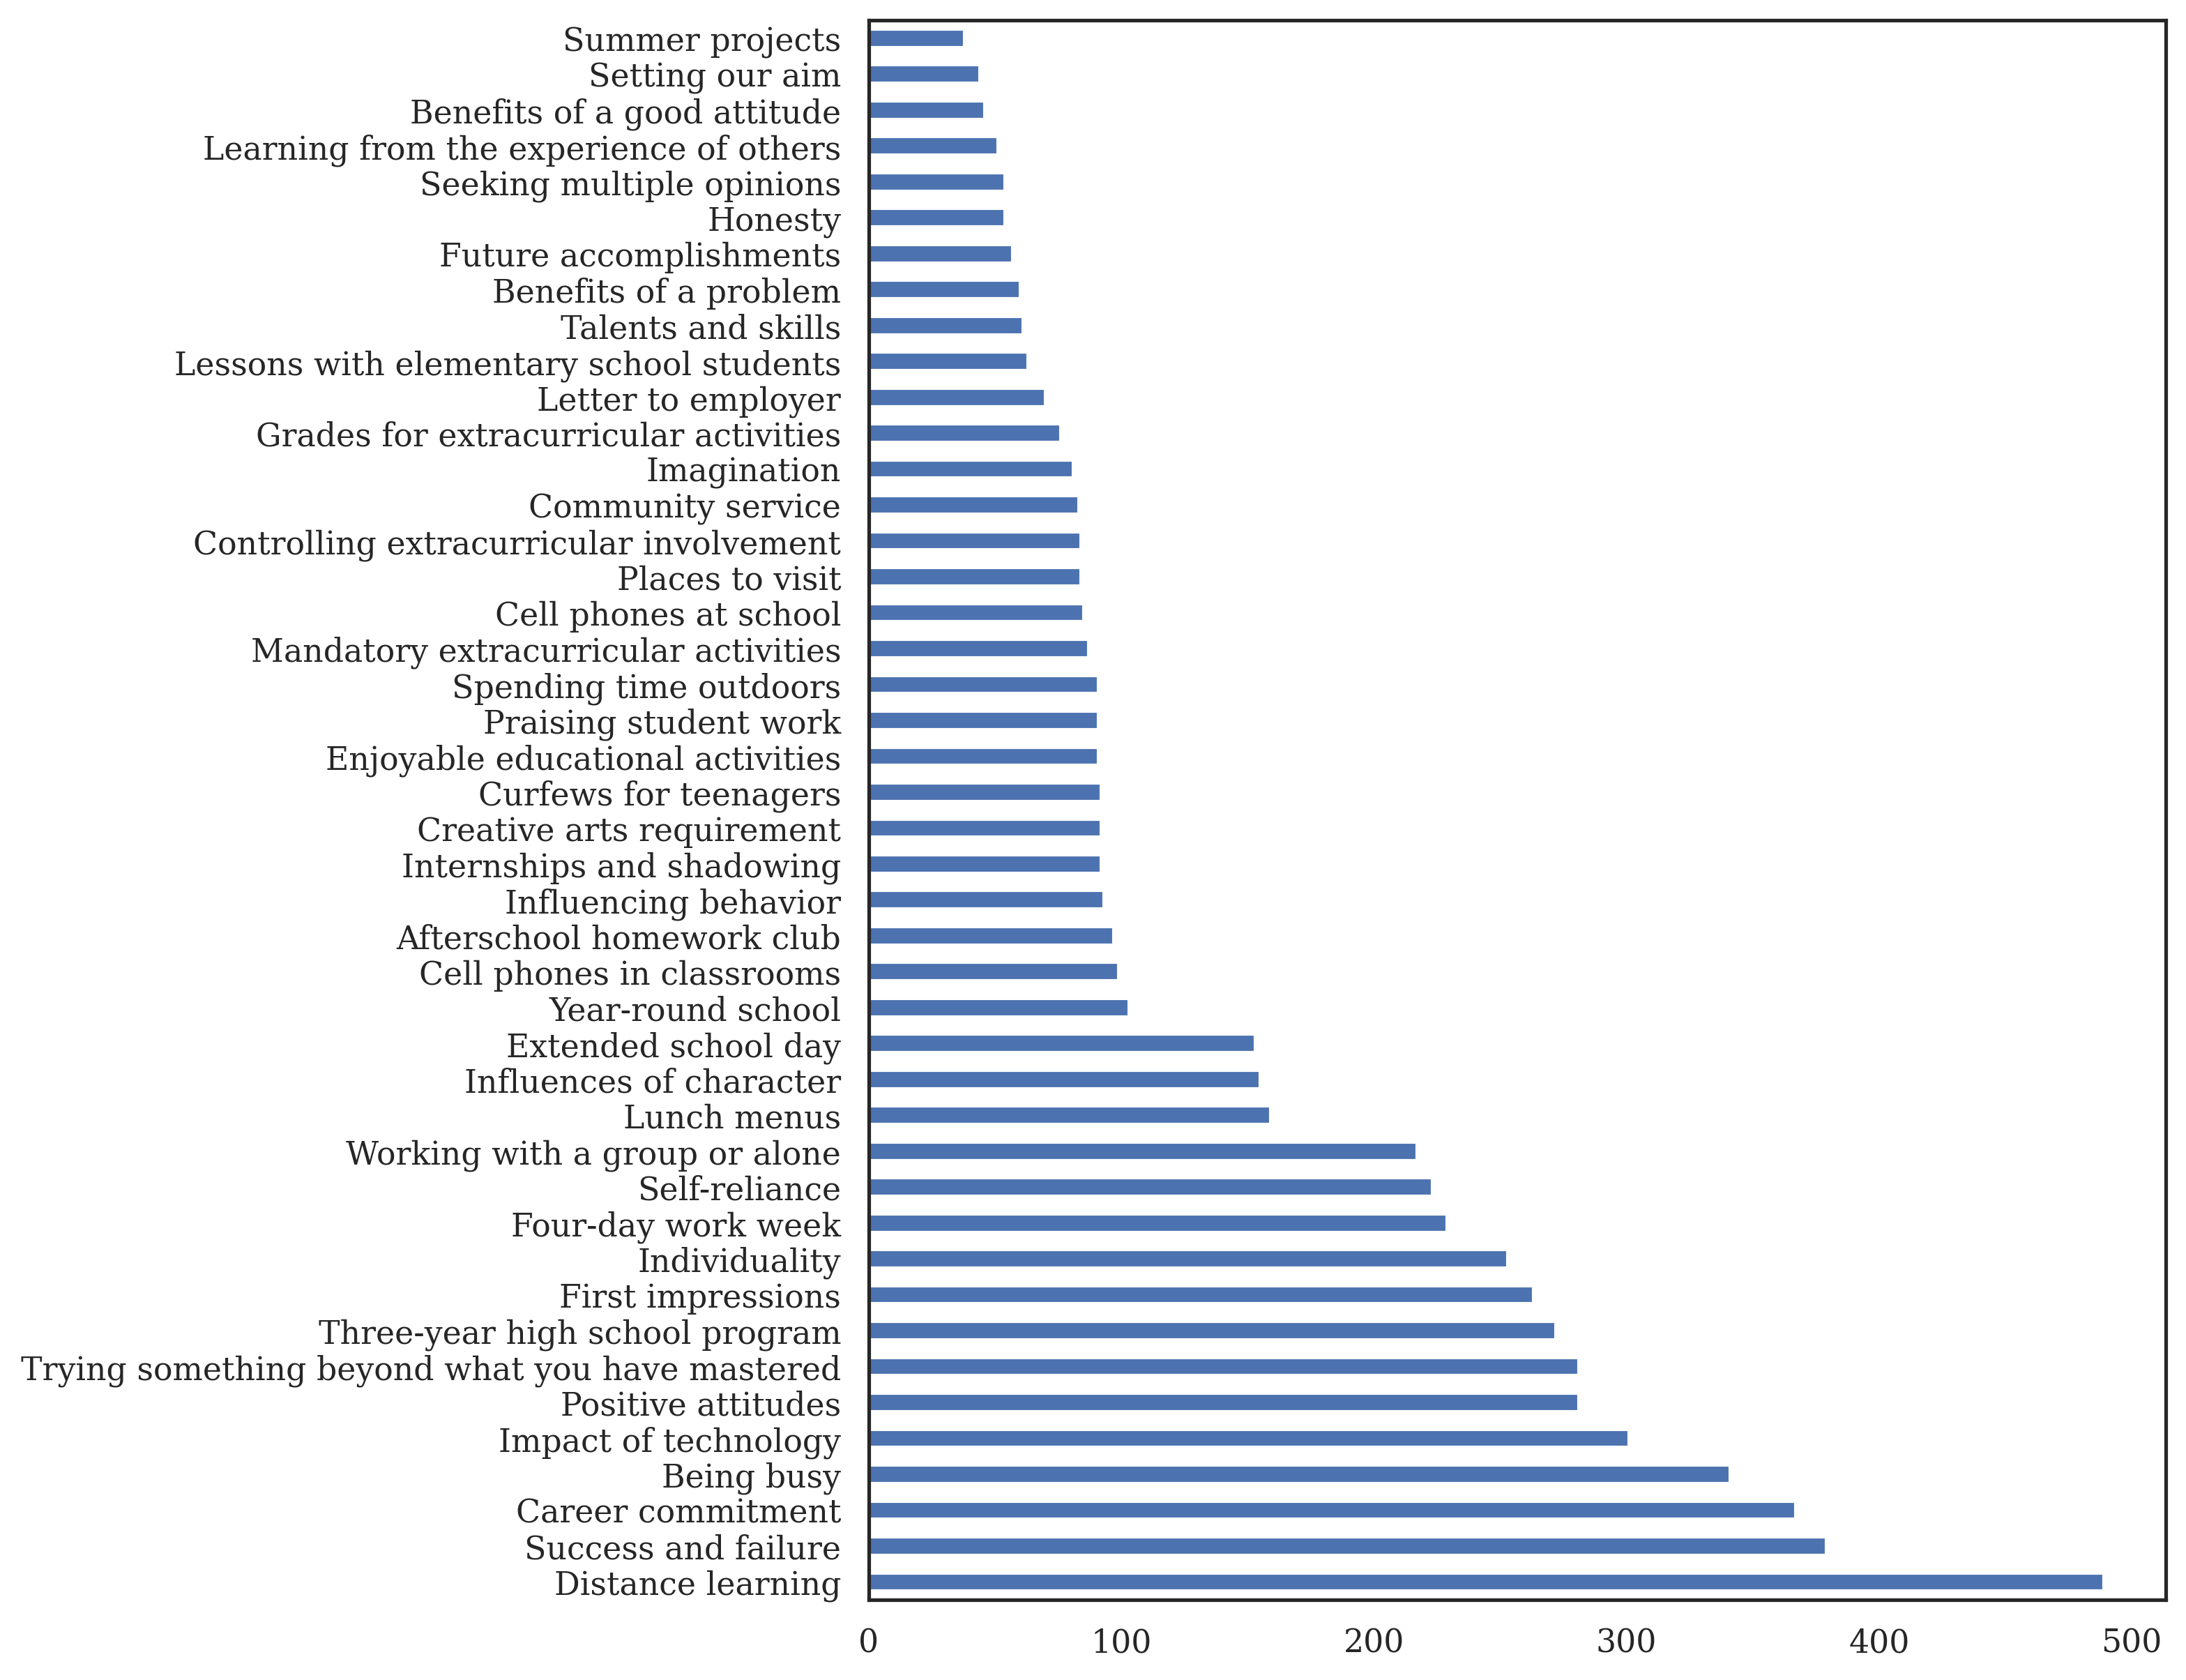

In [4]:
# Create a horizontal bar plot (bar'h') using the values in the 'prompt' column of the dataframe
# Semicolon is added at the end of the line to suppress some unwanted information from being printed
df.prompt.value_counts().plot.barh(figsize=(8,10));

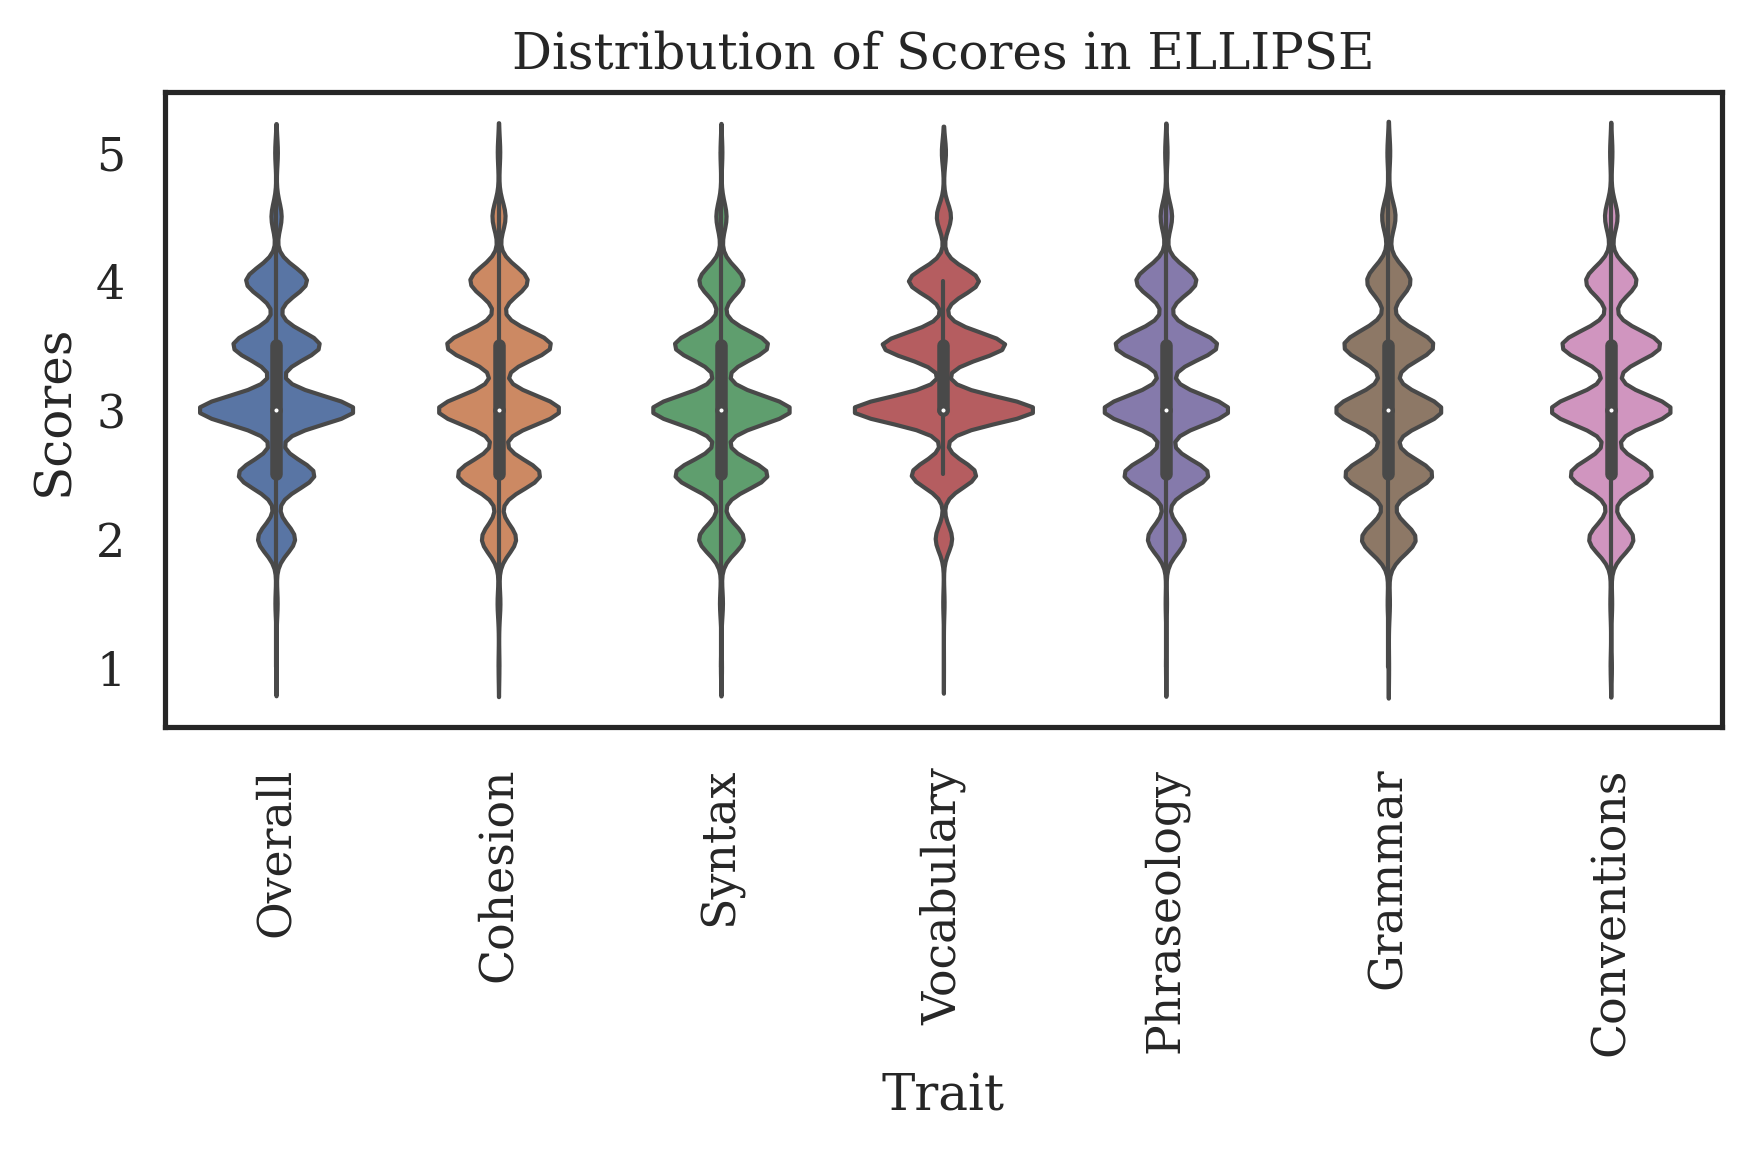

In [5]:
# Initialize list of variables that we are interested in inspecting and visualizing
scores = ['Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology', 'Grammar', 'Conventions']
categorical = ['race_ethnicity', 'gender', 'grade', 'SES']

# Initialize plot. Number inside the parentheses denote the plot's size in inches
f = plt.figure(figsize=(6, 4))

# Create violinplot that displays the distribution of different scores in the ELLIPSE corpus dataframe
g = sns.violinplot(x='variable', y='value',
                   data=df.melt(id_vars=['text_id_kaggle'], value_vars=scores),
                   linewidth=1,
                   inner='box',
                  )
for label in g.get_xticklabels():
    label.set_rotation(90)

# Change labels for x axis and y axis and title. Adjust paddings around the plot. 
g.set(xlabel='Trait', ylabel='Scores', title='Distribution of Scores in ELLIPSE')
f.tight_layout()

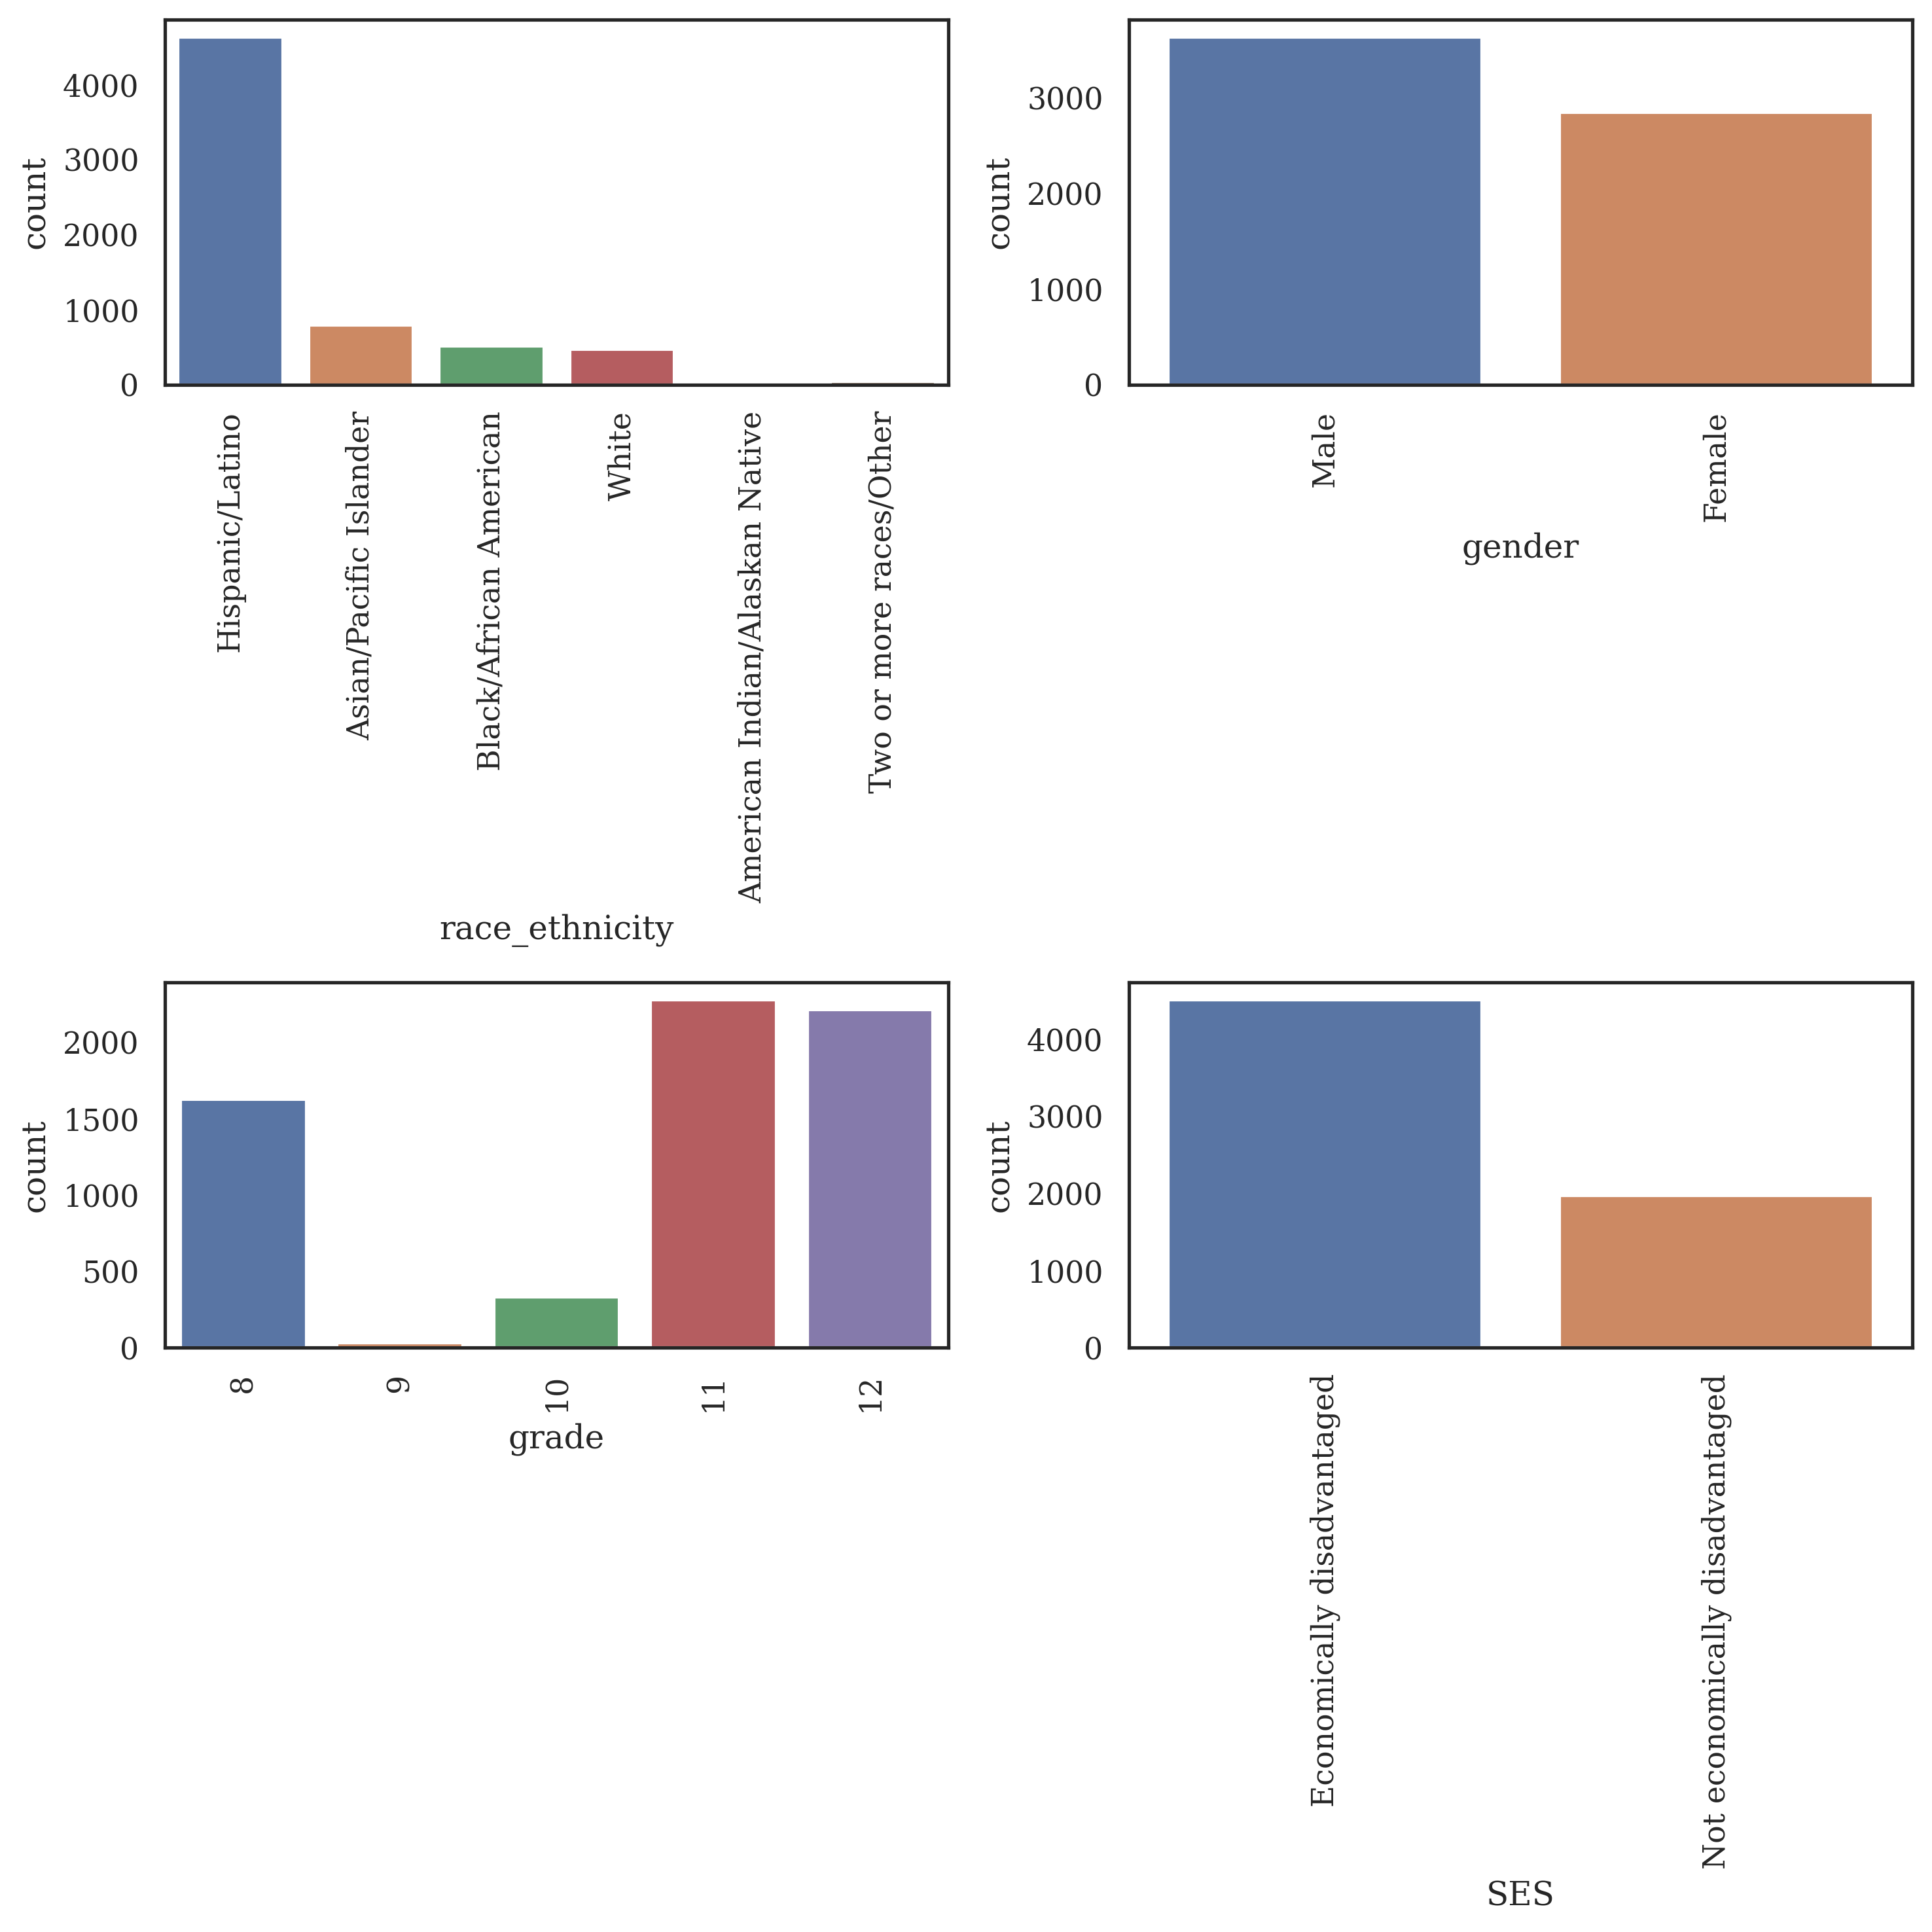

In [6]:
# Initialize new plots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Iterate over the different categories of demographic information using the list we created in the previous cell
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

fig.tight_layout()